[*********************100%***********************]  1 of 1 completed

    Date  Revenue
8   2013   2013.0
9   2012    413.0
10  2011    204.0
11  2010    117.0
12  2009    112.0


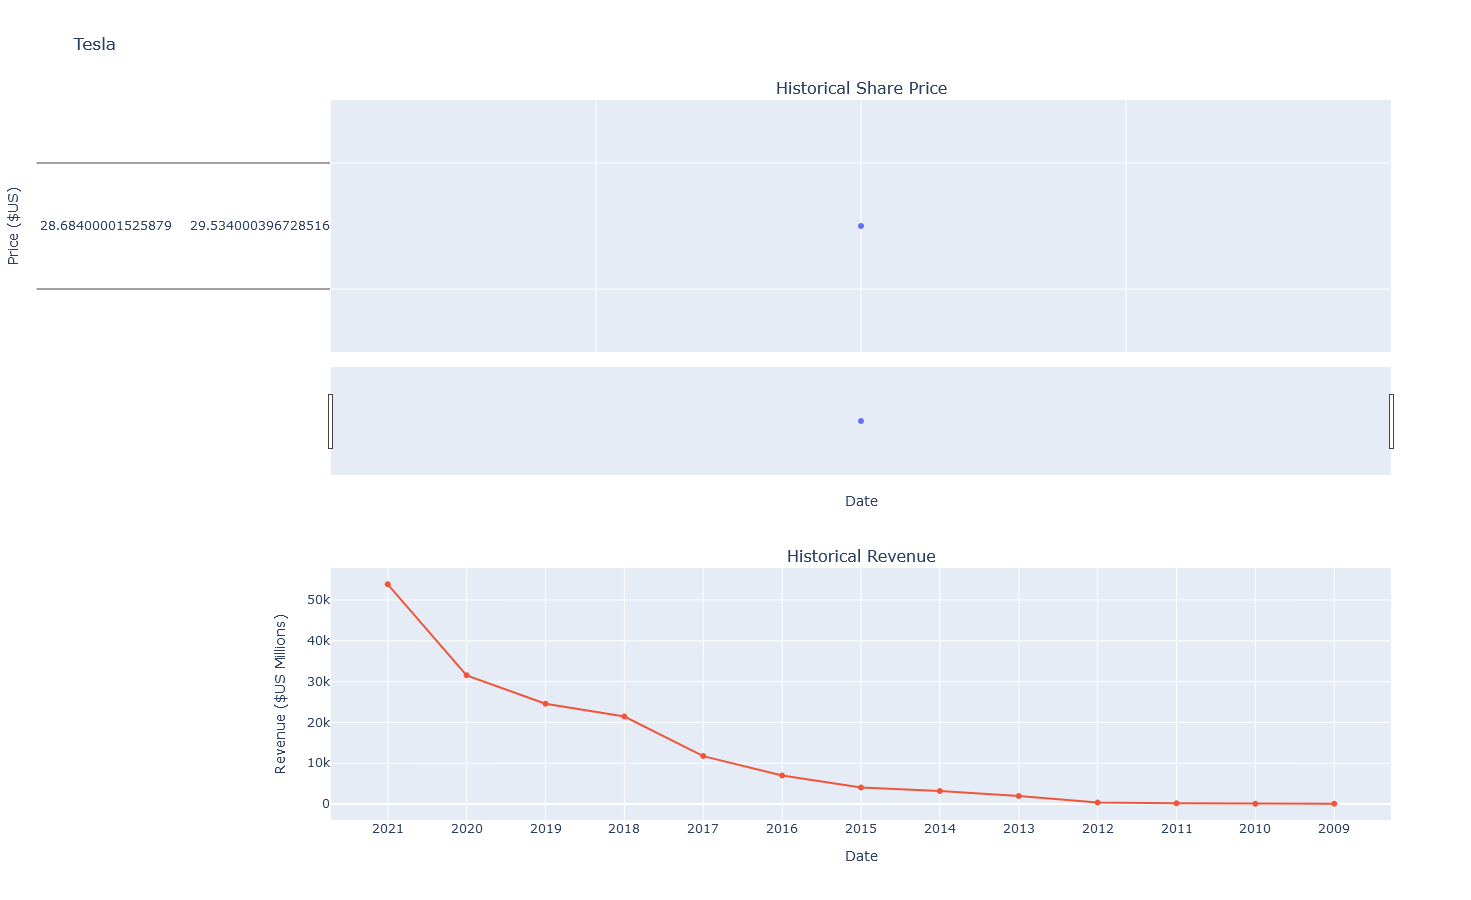

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import yfinance as yf
import plotly.graph_objects as go
from plotly.subplots import make_subplots


import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
data = requests.get(url).text
soup = BeautifulSoup(data, 'html.parser')

tesla_data = pd.DataFrame(columns=["Date", "Revenue"])

for row in soup.find("tbody").find_all('tr'):
    col = row.find_all("td")
    date = col[0].text.strip()
    tesla_revenue = col[1].text.strip()
    
    tesla_data = pd.concat([tesla_data, pd.DataFrame({"Date": [date], "Revenue": [tesla_revenue]})], ignore_index=True)

tesla_data["Revenue"] = tesla_data["Revenue"].replace({r'\$': '', r',': '', r' ': ''}, regex=True)

tesla_data["Revenue"] = tesla_data["Revenue"].astype(float)

print(tesla_data.tail())

stock_data = yf.download('TSLA', start='2020-01-01', end='2021-06-14')

def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    
    stock_data_specific = stock_data[stock_data.index <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data['Date'] <= '2021-04-30']
    
    fig.add_trace(go.Scatter(x=stock_data_specific.index, y=stock_data_specific['Close'].astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=revenue_data_specific['Date'], y=revenue_data_specific['Revenue'].astype("float"), name="Revenue"), row=2, col=1)
    
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False, height=900, title=stock, xaxis_rangeslider_visible=True)
    
    fig.show()

make_graph(stock_data, tesla_data, "Tesla")